In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=b3176086bf2df54de2de73984a17ca399b1f6dfef4d294cfd73eae922f667754
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/pemain bola.csv")
df

,Nama,Jumlah_Gol,Jumlah_Assist,Rating_Pertandingan,Jumlah_Trofi,Usia,Jumlah_Penampilan_Tim_Nasional
0,Messi,45,20,9.5,5,34,150
1,Ronaldo,40,15,9.3,4,37,170
2,Lewandowski,50,10,9.7,4,33,120
3,Salah,35,25,9.4,3,29,100
4,Mbappe,30,20,9.6,2,23,70
5,Neymar,25,30,9.2,3,29,110
6,De Bruyne,15,35,9.6,2,30,80
7,Kane,40,10,9.3,1,28,90
8,Haaland,35,5,9.8,1,21,50
9,Benzema,30,15,9.5,2,34,100


In [ ]:
df = df.select_dtypes(include=[np.number])
df_normalized = (df-df.min())/(df.max()-df.min())

data = df_normalized.values.T

In [ ]:
k = 3  # Jumlah Cluster

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, k, 2, error=0.005, maxiter=1000, init=None
)


In [ ]:
df['cluster'] = np.argmax(u, axis=0)

df['cluster']

0     2
1     2
2     2
3     2
4     1
5     2
6     2
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    0
15    2
16    2
17    1
18    1
19    0
20    0
21    0
22    2
23    1
24    2
25    1
26    2
27    2
28    1
29    0
30    0
31    0
32    2
33    2
34    0
35    0
36    0
37    2
38    1
39    1
40    0
41    0
Name: cluster, dtype: int64

In [ ]:
df

,Jumlah_Gol,Jumlah_Assist,Rating_Pertandingan,Jumlah_Trofi,Usia,Jumlah_Penampilan_Tim_Nasional,cluster
0,45,20,9.5,5,34,150,2
1,40,15,9.3,4,37,170,2
2,50,10,9.7,4,33,120,2
3,35,25,9.4,3,29,100,2
4,30,20,9.6,2,23,70,1
5,25,30,9.2,3,29,110,2
6,15,35,9.6,2,30,80,2
7,40,10,9.3,1,28,90,1
8,35,5,9.8,1,21,50,1
9,30,15,9.5,2,34,100,1


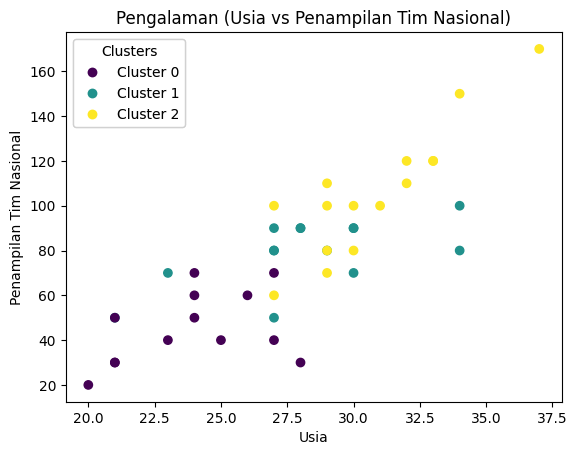

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 4], df.iloc[:, 5], c=df['cluster'], cmap='viridis')
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'], title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Usia')
plt.ylabel('Penampilan Tim Nasional')
plt.title('Pengalaman (Usia vs Penampilan Tim Nasional)')
plt.show()

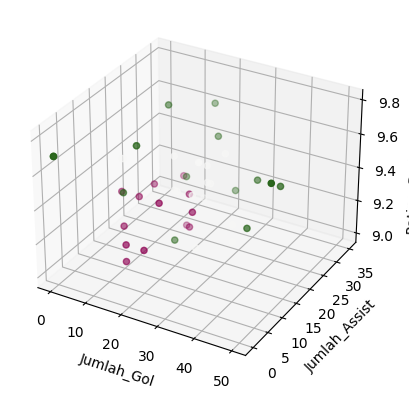

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Jumlah_Gol'], df['Jumlah_Assist'], df['Rating_Pertandingan'], c=df['cluster'], cmap='PiYG')

ax.set_xlabel('Jumlah_Gol')
ax.set_ylabel('Jumlah_Assist')
ax.set_zlabel('Rating_Pertandingan')

plt.show()

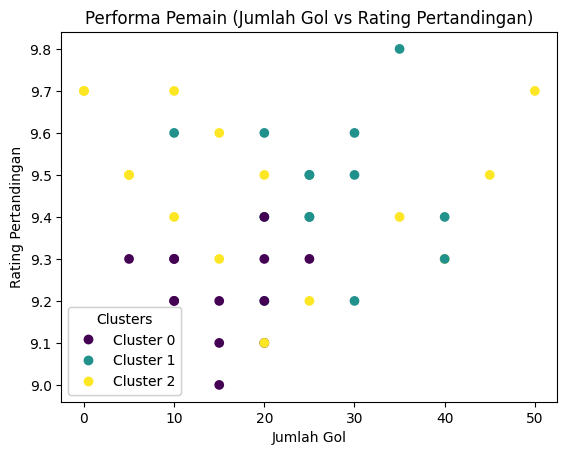

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 2], c=df['cluster'], cmap='viridis')
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'], title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Jumlah Gol')
plt.ylabel('Rating Pertandingan')
plt.title('Performa Pemain (Jumlah Gol vs Rating Pertandingan)')
plt.show()

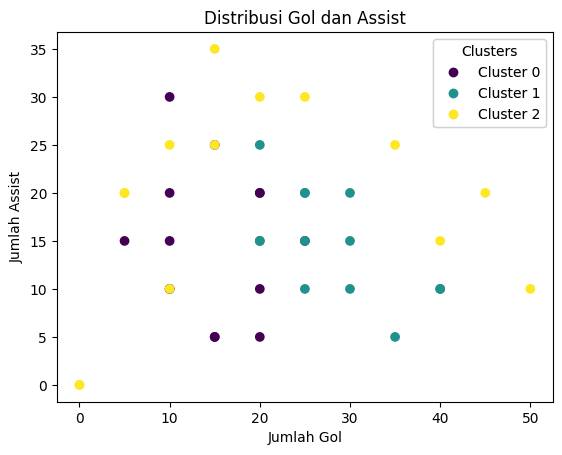

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'], title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Jumlah Gol')
plt.ylabel('Jumlah Assist')
plt.title('Distribusi Gol dan Assist')
plt.show()